# NHL Draft dataset
# Modeling
# Records
## Most Goals by a Rookie in a Single Season
This notebook presents modeling performed on NHL Records data obtained from NHL Records API Records endpoint.
### Data collection summary
Dataset generated from a JSON received from the NHL Records API, contains response to the request for all draft records.

For details, see notebook `notebooks/feature_extraction/nhl_api.ipynb`.

## Preparations
### Import dependencies

In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

os.chdir('Documents/repos/nhl_draft/') # might need to comment this out

from src.io_utils import csv_to_df_rec
from src.plot_utils import plot_decision_regions
from src.class_utils import fit_class

os.listdir()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Documents/repos/nhl_draft/'

### Load data

In [2]:
rec_name = 'most-goals-rookie-one-season'
suffix = '_new_cols'
df, name = csv_to_df_rec(rec_name, suffix)

----- NHL Records
--- Most Goals, Rookie, Season 

----- DataFrame with NHL Records Data loaded
in 0.15 seconds
with 3,377 rows
and 62 columns
-- Column names:
 Index(['activePlayer', 'assists', 'assistsPerGpMin20', 'firstGoals',
       'firstName', 'fiveGoalGames', 'fourGoalGames', 'gameWinningGoals',
       'gamesInSchedule', 'gamesPlayed', 'goals', 'goalsPerGpMin20',
       'goalsPerGpMin50', 'id', 'lastName', 'overtimeAssists', 'overtimeGoals',
       'overtimePoints', 'penalties', 'penaltyMinutes', 'playerId', 'points',
       'pointsPerGpMin50', 'positionCode', 'powerPlayGoals', 'rookieFlag',
       'seasonId', 'sevenGoalGames', 'shorthandedGoals', 'shots',
       'sixGoalGames', 'teamAbbrevs', 'teamNames', 'threeGoalGames',
       'threeOrMoreGoalGames', 'assists_norm', 'firstGoals_norm',
       'gameWinningGoals_norm', 'gamesPlayed_norm', 'goals_norm',
       'overtimeGoals_norm', 'overtimePoints_norm', 'penalties_norm',
       'penaltyMinutes_norm', 'points_norm', 'powerPlayGo

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 62 columns):
activePlayer             3377 non-null bool
assists                  3377 non-null int64
assistsPerGpMin20        731 non-null float64
firstGoals               3377 non-null int64
firstName                3377 non-null object
fiveGoalGames            308 non-null float64
fourGoalGames            308 non-null float64
gameWinningGoals         3377 non-null int64
gamesInSchedule          3377 non-null int64
gamesPlayed              3377 non-null int64
goals                    3377 non-null int64
goalsPerGpMin20          340 non-null float64
goalsPerGpMin50          4 non-null float64
id                       3377 non-null int64
lastName                 3377 non-null object
overtimeAssists          3377 non-null int64
overtimeGoals            3377 non-null int64
overtimePoints           3377 non-null int64
penalties                3377 non-null int64
penaltyMinutes           3377 non-

## Select features and target
### Two features: goals and assists

## Classification algorithms
Classification algorithms are fitted on data and decision boundaries are plotted.

In [50]:
xcol1 = 'goals'
xcol2 = 'gamesPlayed'
ycol = 'def'
X = df[[xcol1, xcol2]]
y = df[ycol]

fit_class(X, y, classifier=['perc', 'lr', 'tree'], 
          plot_res='save', xlabel=xcol1, ylabel=xcol2)


----- Fitting PERC
Plot saved to file img/decision_boundaries/goals_gamesPlayed_perc.png

 - took 3.04 seconds.

----- Fitting LR
Plot saved to file img/decision_boundaries/goals_gamesPlayed_lr.png

 - took 4.97 seconds.

----- Fitting TREE
Plot saved to file img/decision_boundaries/goals_gamesPlayed_tree.png

 - took 3.74 seconds.


C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
dot_data = export_graphviz(model,
                           filled=True, 
                           rounded=True,
                           class_names=['def', 
                                        'for'],
                           feature_names=[xcol1, 
                                          xcol2],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('img/tree.png')

## Multi-class classification
### Encoding target

In [54]:
le = LabelEncoder()
df['pos'] = le.fit_transform(df['positionCode'])
print("Positions encoded!")

xcol1 = 'goals'
xcol2 = 'assists'
ycol = 'pos'
X = df[[xcol1, xcol2]]
y = df[ycol]

fit_class(X, y, classifier=['perc', 'lr', 'tree'], 
          plot_res='save', xlabel=xcol1, ylabel=xcol2, 
          save_path="multi-class/")

Positions encoded!

----- Fitting PERC
Plot saved to file img/decision_boundaries/multi-class/goals_assists_perc.png

 - took 3.82 seconds.

----- Fitting LR
Plot saved to file img/decision_boundaries/multi-class/goals_assists_lr.png

 - took 3.73 seconds.

----- Fitting TREE
Plot saved to file img/decision_boundaries/multi-class/goals_assists_tree.png

 - took 3.49 seconds.


C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Logistic regression

C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


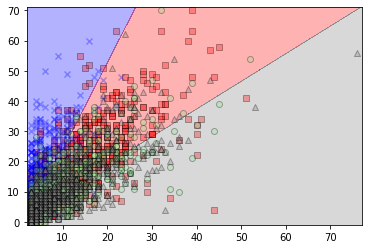

In [15]:
model = LogisticRegression(C=100.0, random_state=1)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

### Maximum margin classification with support vector machines

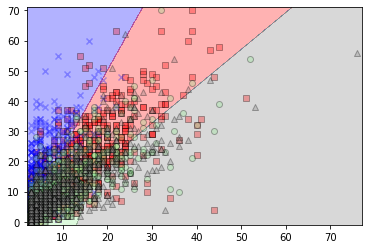

In [16]:
model = SVC(kernel='linear', C=1.0, random_state=1)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

### Solving nonlinear problems using a kernel SVM

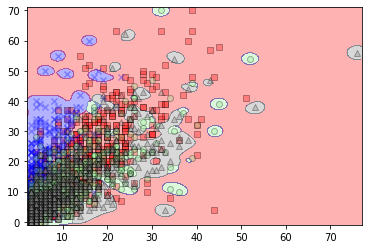

In [17]:
model = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

### Decision tree learning

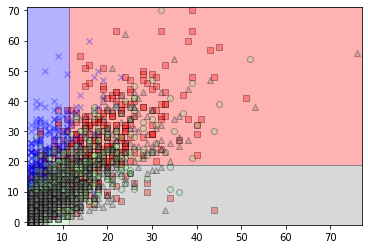

In [18]:
model = DecisionTreeClassifier(criterion='gini',
                               max_depth=4, 
                               random_state=1)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

### Combining multiple decision trees via random forests

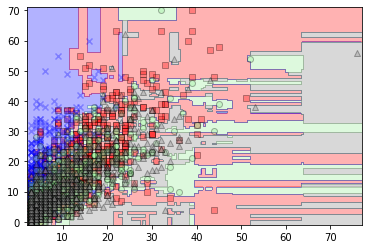

In [19]:
model = RandomForestClassifier(criterion='gini',
                               n_estimators=25,
                               random_state=1,
                               n_jobs=2)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

## All features

In [ ]:
mask = pd.Series(df.columns).str.contains('std')
x_cols = df.columns[mask]
X = df[x_cols]
